In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
class LinearRegression:
    def __init__(self, x, y , lr = 0.001) -> None:
        self.w = np.random.randn(x.shape[1], y.shape[1])
        self.x = x
        self.y = y
        self.lr = lr
        
    def forward(self):
        self.pred = self.x @ self.w
        self.loss = (self.y - self.pred)**2
        return (self.pred, self.loss)
    
    def backward(self):
        dl = 2*(self.x.T @ (self.pred - self.y))
        self.w = self.w - self.lr*dl/self.x.shape[0]

In [12]:
def normalize(data):
    for column in range(data.shape[1]):
        x = data[ :,column]
        mi = np.min(x)
        me = np.mean(x)
        n = (x - mi)/(me)
        data[ :,column] = n
    return data
def prepare_data(data2d, train= True):
    # split and change data
    x = data2d.iloc[:,1:]
    y = data2d.iloc[:, 0]
    if train:
        b = np.ones((len(x), 1))
        x = np.concatenate((x, b), axis= 1)
    #list to dict
    species = dict(zip(y.unique(), range(len(y.unique())))) 
    print(species)
    # mapping y value to number
    y = y.map(species)
    x = np.array(x)
    y = np.array(y).reshape((-1,1))
    if train:
        x = normalize(x)
    # y = normalize(y)
    print(f"Xshape = {x.shape}, Yshape = {y.shape}")
    # print(x)
    return x,y

def get_data(path = "./Fish.csv"):
    data = pd.read_csv(path)
    print(f"data shape: {data.shape}")
    print(f"data header: {data.columns}")
    return data

data = get_data()
x, y = prepare_data(data)

data shape: (159, 7)
data header: Index(['Species', 'Weight', 'VerticalLen', 'DiagonalLen', 'CrossLen', 'Height',
       'Width'],
      dtype='object')
{'Bream': 0, 'Roach': 1, 'Whitefish': 2, 'Parkki': 3, 'Perch': 4, 'Pike': 5, 'Smelt': 6}
Xshape = (159, 7), Yshape = (159, 1)


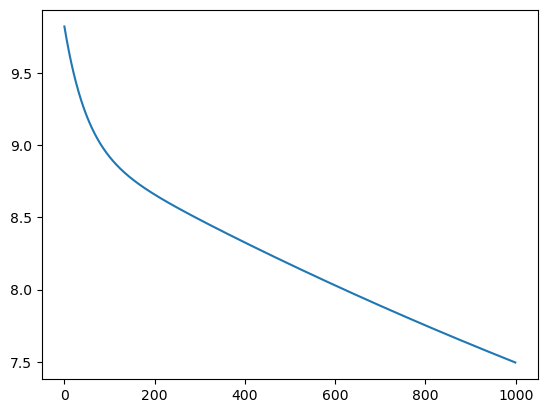

In [4]:
model = LinearRegression(x,y)
loss = []
def train(model, epochs = 1000):
    for epoch in range(epochs):
        l = np.mean(model.forward()[1])
        loss.append(l)
        model.backward()
        # if epoch%10==0: print(f"epoch: {epoch} - loss: {l}")
    

train(model)
plt.plot(loss)
plt.show()

In [14]:
# test on salaries
data2 =  get_data("./Salaries.csv")
x2,y2 = prepare_data(data2)
model2 = LinearRegression(x2, y2)
loss = []
train(model2)

data shape: (10, 3)
data header: Index(['Position', 'Level', 'Salary'], dtype='object')
{'Business Analyst': 0, 'Junior Consultant': 1, 'Senior Consultant': 2, 'Manager': 3, 'Country Manager': 4, 'Region Manager': 5, 'Partner': 6, 'Senior Partner': 7, 'C-level': 8, 'CEO': 9}
Xshape = (10, 3), Yshape = (10, 1)


In [58]:
pred = np.array(model2.forward()[0])
print(pred)

[[ 0.        ]
 [ 0.6568813 ]
 [ 1.33999538]
 [ 2.07557501]
 [ 2.86362019]
 [ 3.70413092]
 [ 4.59710721]
 [ 5.75241124]
 [ 7.43237079]
 [10.68629687]]


{'Business Analyst': 0, 'Junior Consultant': 1, 'Senior Consultant': 2, 'Manager': 3, 'Country Manager': 4, 'Region Manager': 5, 'Partner': 6, 'Senior Partner': 7, 'C-level': 8, 'CEO': 9}
Xshape = (10, 2), Yshape = (10, 1)
Figure(500x500)


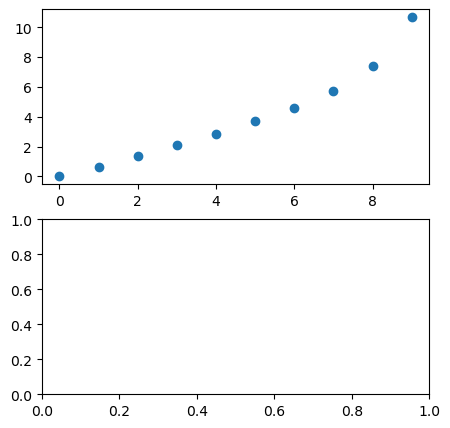

In [69]:
x3, y3 = prepare_data(data2, 0)
fig, ax = plt.subplots(2,1, figsize=(5, 5))
ax[0].scatter(y3, pred)
print(fig)